# Problems 4 - Polynomial regression (remaining problem)

In [61]:
def GradientDescent_np(X, y, max_iterations=100, alpha=1):
    m, n = X.shape # number of samples, number of features
    J = np.zeros(max_iterations)

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations (it would be nice to also check convergence...)
    for iteration in range(max_iterations):
        grad = np.dot(X.T , (np.dot(X,w) - y)) / m;
        w = w - alpha*grad
        J[iteration] = sum( (np.dot(X,w) - y)**2)
    return [w, J]

## 4.6 Higher-degree Polynomial Regression

Suppose you are given the following samples for a problem:

In [62]:
import numpy as np

# This is a single feature, with 50 data points
feat = np.array([ 3.69, -0.01,  3.92,  3.76,  4.77,  2.65, -3.2 , -3.68,  4.84,
        2.35, -3.46,  3.36,  0.05, -2.43,  4.5 ,  2.99, -4.58, -2.38,
        4.75, -0.99,  2.43,  1.03, -0.91,  0.49, -1.07, -4.56,  2.7 ,
       -1.89, -4.46, -3.22,  4.11, -1.4 , -2.15, -3.08,  1.22,  4.15,
       -3.32, -0.96,  2.28, -0.22,  1.63, -3.16,  0.57,  1.12,  0.46,
       -4.42, -1.98, -4.59, -3.27,  3.77])

# And this is the output for each of the 50 data points
out = np.array([ -4.01526321,   4.91472839,  -6.45656423,  -2.62612898,
        -8.51413128,   3.34151409,  12.88771229,  34.65904607,
       -13.35431265,   4.30981981,  21.88485042,   1.12385015,
        -2.91774249,  14.50057692,  -1.24198533,  -4.55757528,
        45.46247156,   8.26033485, -17.30334323,  -9.70654351,
       -11.24523311, -10.24578944,   2.52139723,   9.46442395,
        -2.6732785 ,  47.77493771,  -1.3560507 ,  -3.87657515,
        47.12672411,  19.07990287,  -0.9455647 ,   0.35427309,
         9.80390966,  19.42353943,   3.11970979,   3.44865065,
        21.42035593,  -7.88242488,   5.64544367,  10.20227577,
        -0.62195752,  14.75901715,   9.12831525,   7.21057155,
         4.53708356,  45.98559999,  -3.86594125,  50.79311745,
        25.99250789,  -3.46524068])

Let's make a plot of the above samples

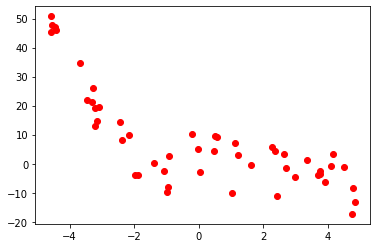

In [63]:
import matplotlib.pyplot as plt

plt.plot(feat, out, 'ro') # Plot the feature versus the output, using big red circles

In order to use the linear gradient descent above to fit a polynomial, what we have to do is generate new features, from the existing ones. For example we could generate a new feature $feat_2$ and calculate its values as the square of $feat$: $feat_2 = feat^2$.

Similarly we could create more new features like:

$feat_3 = feat^3$

$feat_4 = feat^4$

$...$

Then we would have to normalise each of these new features, using its mean and standard deviation.

To make our life easier, we will define a function that automates this process. It creates features up to a degree, calculates the means and standard deviations, and uses them to normalise them. The output would be the new design matrix for our problem.

Remember that once we calcualte our model, we should use the same procedure to generate and normalise features for new data points (our test set) before we feed them in the model. For this we would need to keep track of the means and standard deviations we used in the first place. Therefore, we can make our function return also these means and standard deviations so that we can keep them in a safe place. Finally, we can make our function use our pre-calculated means and standard deviations when we want to, instead of calculating new ones. So when we apply it on our test set, we can ask it to use the same means and standard deviations that we used for the training set.

You can skip this part and just use this function as is.

In [64]:
def mapFeatureAndNormalise_Polynomial(x, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps a single 1D feature to polynomial features up to the degree given
    Returns a new feature vector comprising of
    1, x, x^2, x^3, ..., x^degree
    '''
    
    x = x.reshape(-1, 1) #make into a vector if it has any other shape. The function size returns the number of elements in an array
    
    DesignMatrix = np.ones_like(x) # start with a column of ones
    
    for i in range(1, degree + 1):
            c = x ** i
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd
    
    # Standardise
    for i in range(1, degree + 1):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i]
                
    return DesignMatrix, mu, sigma

Let's create such new features up to the power of 2.

In [65]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)
print("Shape of design matrix: ", X.shape) # Expected shape = (# of samples, # features + 1)
print("Shape of means (and sigma): ", mu.shape) # Expected shape = # features + 1

Shape of design matrix:  (50, 3)
Shape of means (and sigma):  (3,)


Let's now use our gradient descent function to fit a 2-degree polynomial model to the same data. To do this, we should pass to the function the set of features up to the power of 2: `[1, feat, feat2]`

Estimated weights:  [[  7.84509192]
 [-13.60627612]
 [  7.01751284]]


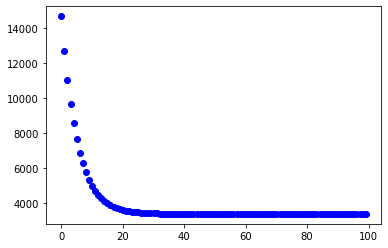

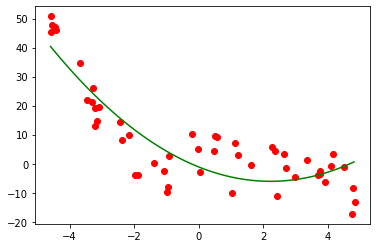

In [66]:
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = 2)

w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)  # Since we passed it three features (3 columns in our design matrix), we expect to receive three weight values

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')  # To plot the evolution of the Cost (J) we use as x a list of numbers from 1 to the number of elements inside J, and as y the values in J

# Plot line y = w0 + w1 * x + w2 * x^2
plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles

# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

# Now for each of our points in the range defined above, we need to calculate what our model gives us
# IMPORTANT: in order to pass the values in xx through our model, we need to create and normalise polynomial features in the same way as before!

yy = [w[0] + w[1] * (x-mu[1])/sigma[1] + w[2] * (x**2-mu[2])/w[2] for x in xx] # This is a pretty inefficient way to do this

plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

Let's look in a more efficient way to pass new data through our model. We will create and normalise new features using the same `map_feature()` function, and the pre-calculated means and standard deviations. Then it should be just a matter of calculating a weighted sum (or else a dot product, vectorising this operation). It is important to see that

$y = w_0 + w_1 * x + w_2 * x^2$

is equivalent to 

$y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2$, where $x_0 = 1$, $x_1 = x$ and $x_2 = x^2$

Importantly, doing this in this vectorised form, allows us to change the number of dimensions (degrees) without having to change our code.

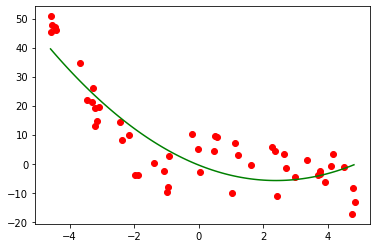

In [67]:
# To plot our solution, we need to use the Thetas we have been given and calculate our estimated output for a series of points
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = 2, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line
plt.show()

<font color=blue>What is the final cost value of the above fit?</font>

In [68]:
#Your Code Here#

# The final Cost value is the last value we have in the list of costs (the cost at the very last iteration). We can access it by indexing at -1 (one element from the end of the list)
print('Final cost:{0}'.format(J[-1]))

Final cost:3377.9111537746257


<font color=blue>Can you fit a 3-degree polynomial and a 4-degree polynomial? What is the final cost value in these cases? HINT: to fit higher order polynomials you should just give more columns to your gradient descent, to include the corresponding 3-degree and 4-degree features.</font>

Estimated weights:  [[  7.84509192]
 [ -2.76031548]
 [  7.39547525]
 [-12.08292218]]
Final cost:  1635.6102190304023


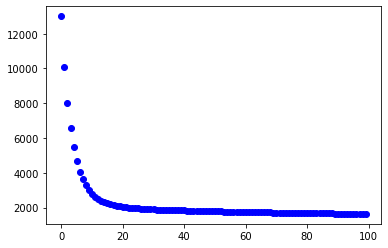

<Figure size 432x288 with 0 Axes>

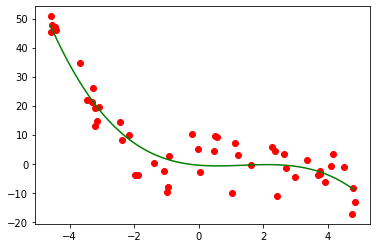

In [69]:
#Your Code Here#

D = 3 # Change this to the degree you want
X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
w, J = GradientDescent_np(X, out, alpha=0.1)

print('Estimated weights: ', w)

#Plot the evolution of the cost
plt.plot(np.arange(len(J)), J, 'bo')
print('Final cost: ', J[-1])

# Plot line y = theta_0 + theta_1 * x + theta_2 * x^2 + theta_3 * x^3
plt.figure()
xx = np.arange(feat.min(),feat.max(), 0.1) # Let's first define a series of points: from the minimum value of the original feature to the maximum value, every 0.1

X, mu, sigma = mapFeatureAndNormalise_Polynomial(xx, degree = D, preCalcMeans = mu, preCalcStd = sigma)
yy = X @ w # @ is the operator for matrix multiplication. This is equivalent to yy = np.matmul(X, w)

plt.figure() # We first create a new figure, otherwise it will include this plot in the previous one
plt.plot(feat, out, 'ro') # Here we plot the original feature vs out of our data as big red circles
plt.plot(xx, yy, 'g') # Now we can plot our points in the range vs the estimated value calculated by our model, connected by a green line

<font color=blue> Can you reuse the above code to create the appropriate design matrices and try to fit polynomials of up to degree 15? How does the final cost change as you try polynomials of higher degrees?</font>

Text(0, 0.5, 'Final Cost')

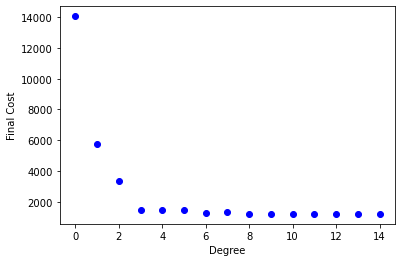

In [70]:
#Your Code Here#

costs = []

for D in np.arange(15):
    X, mu, sigma = mapFeatureAndNormalise_Polynomial(feat, degree = D)
    w, J = GradientDescent_np(X, out, max_iterations = 5000, alpha=0.1)
    
    # Keep track of the cost after
    costs.append(J[-1])

#Plot the evolution of final cost versus the degree
plt.figure()
plt.plot(costs, 'bo')
plt.xlabel("Degree")
plt.ylabel("Final Cost")

# Problems 5 - Logistic Regression

## 5.1 Logistic Regression

We are going train a binary classifier using the Logistic Regression model: $f_w(\textbf{x}) = \frac{1}{1+e^{-w^\intercal \textbf{x}}}$

For this we need to fit the parameters $w$ to our dataset by minimizing the cost function $J$:

$\hat{w} = \underset{w}{\text{minimize}} (J) = \underset{w}{\text{minimize}} {1 \over m} \sum_{i=1}^m{-y^{(i)}\log(f_w(x^{(i)}) - (1-y^{(i)})\log(1-f_w(x^{(i)})}$

where $(x^{(i)},y^{(i)})$ is the i-th training sample, and $m$ is the number of samples in the training set.

We are going to use the Gradient Descent algorithm to solve this minimization problem, in pseudo-code:

repeat until convergence (or max. number of iterations) 

{

$w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w)$ (for all j)

}

where $\alpha$ is the learning rate, and the partial derivative (the gradient) of the cost function is given by:

$\frac{\partial}{\partial w_j} J(w) = {1 \over m} \sum_{i=1}^m{(f_w(x^{(i)}) - y^{(i)}) x_j^{(i)}}$

Notice that the partial derivative of our cost function has the same form as for the Linear Regression cost function, however the difference is in the term $f_w(\textbf{x})$, our model. In the case of Logistic Regression $f_w(\textbf{x})$ is the sigmoid function of $w^\intercal \textbf{x}$.

Thus, the Python code of our **GradientDescent** function is going to be quite the same as for Linear Regression, but calling the **sigmoid** function to evaluate the Logistic Regression model $f_w(\textbf{x})$.

In [71]:
import numpy as np

def sigmoid(X):
    '''
    Computes the Sigmoid function of the input argument X.
    '''
    return 1.0/(1+np.exp(-X))


def GradientDescent_logistic(X,y,max_iterations=10000, alpha=0.1, epsilon = 0.000001):
    m, n = X.shape # number of samples, number of features
    J = []

    # y must be a column vector of shape m x 1
    y = y.reshape(m, 1)
    
    # Create as many parameters as features and initialize them to zero
    w = np.zeros(shape=(n, 1))
    
    # Repeat for max_iterations or until we have converged
    for iteration in range(max_iterations):
        h = sigmoid(np.dot(X, w))
        error = (h-y)
        gradient = np.dot(X.T , error) / m
        w = w - alpha*gradient
        
        J.append( sum(-y*np.log(h)-(1-y)*np.log(1-h)) / m )
        
        if (iteration > 1) and (J[-2] - J[-1]) < epsilon:
            print("Converged after {} iterations".format(iteration))
            break
            
    return [w, J]

def classifyVector(X, w):
    '''
    Evaluate the Logistic Regression model h(x) with theta parameters,
    and returns the predicted label of x.
    '''
    prob = sigmoid(sum(np.dot(X, w)))
    if prob > 0.5: return 1.0
    else: return 0.0

Let's see how to use this code in a synthetic dataset. First load the data and plot it.

In [72]:
# Load the synthetic dataset
import pickle

with open('./P5data_linear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(100, 2)
(100,)


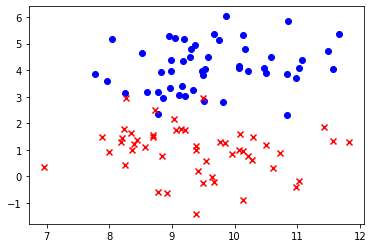

In [73]:
# Plot the data

%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

Now, we train the Logistic Regression classifier and draw its decision boundary in a 2D plot.

In [74]:
# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
#Xaugmented = np.append(x,X,axis=1) #The Design Matrix, which is the original data augmented with the first column of ones
Xaugmented = np.hstack( (ones, X) )

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = [classifyVector(Xaugmented[i,:],w) for i in range(X.shape[0])]
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 5271 iterations
Training Accuracy : 0.95


Next we will define a function to plot the decision boundary, along with data, given a set of weights. You can accept this function as is.

In [75]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary(X, y, w):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):            
            z[i, j] = sigmoid(np.dot(np.array([1,u[i],v[j]]),w))

    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

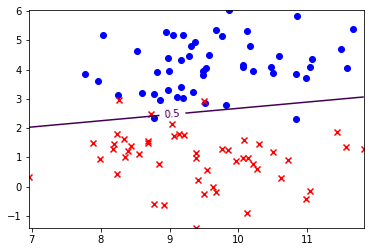

In [76]:
plotDecisionBoundary(X, y, w)

As can be seen in the previous plot the classification boundary with 2 features fits very poorly our data. That does not mean that the gradient descent has not converged, but the best possible solution using a line is not good at all. Check that the learning process has actually converged:

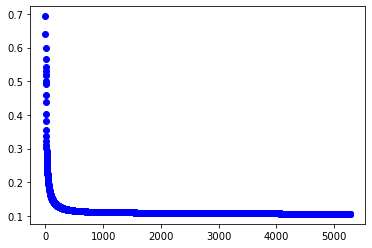

In [77]:
plt.plot(np.arange(len(J)), J, 'bo')

## 5.2 Non-Linear Decision Boundaries

In [78]:
# Load the synthetic dataset
import pickle

with open('P5data_nonLinear.pkl', 'rb') as f:
    X, y = pickle.load(f)

print (X.shape)
print (y.shape)

(117, 2)
(117,)


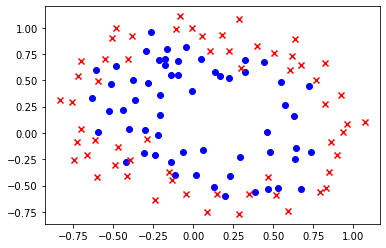

In [79]:
# Plot the data
%matplotlib inline 
import matplotlib.pyplot as plt

plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples
plt.show()

<font color="blue">Train a Logistic Regression classifier and draw its decision boundary over this new data. What do you observe?</font>

In [80]:
# Your Code Here

# Append the x0 column (for the bias term w0)
m, n = X.shape # m is the number of samples and n is the number of features
ones = np.ones(shape=(m, 1))
Xaugmented = np.hstack( (ones, X) )

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(Xaugmented, y)

#Evaluate the classifier accuracy in the training data
H = [classifyVector(Xaugmented[i,:],w) for i in range(m)]
print ("Training Accuracy :", np.sum(H == y) / m)

Converged after 273 iterations
Training Accuracy : 0.5299145299145299


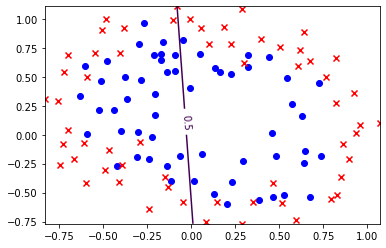

In [81]:
plotDecisionBoundary(X, y, w)

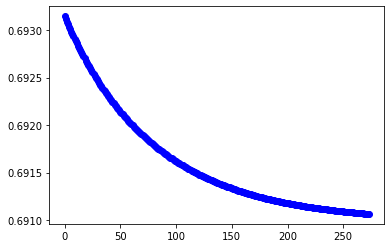

In [82]:
plt.plot(np.arange(len(J)), J, 'bo')

---

In this case, a linear classifier does not separate the data correctly. The gradient descent process does converge (it finds the best solution possible), but the best solution possible here is not really good at all...

---

One way to fit the data better is to create more features from each data point. For example, if we map the original features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power we would get:

$MapFeature(x_1,x_2) = [1, x_1,x_2,x_1^2,x_1x_2,x_2^2,x_1^3, \dots , x_1x_2^5, x_2^6]$

As a result of this mapping, our vector of two features is transformed into a 28-D vector (28 . The Logistic Regression classifier trained on this high dimensional feature space will have a more complex decision boundary (i.e. more degrees of freedom) and will appear nonlinear when drawn in the 2D plot.

To make our life easier, we will make a function to do this mapping of features. Note also that before we can use these new features, we should normalise them. It seems like a good idea to include the normalisation into the same function.

Moreover since at the time of applying our model to new data we would need to normalise any such new data IN THE SAME WAY as the training data we used, it is wise to keep track of the means and sigmas we used for normalising. Therefore, we will return the means and sigmas from the function as well.

Then in the future we could ask the function to use these same means and sigmas for normalisation (instead of calculating them anew), by passing them as arguments. A clever way to do this would be to allow the function to take an array of means and an array of sigmas as arguments. If we do give some values for these, then the function will use these values. If not (so the default empty vector will be given) then the function would calculate these arrays from the data.

Below is the function that does just that. You can accept this code as is if you want.

In [83]:
def mapFeatureAndNormalise_AllQuadTerms(x1, x2, degree = 6, preCalcMeans = None, preCalcStd = None):
    '''
    Maps 2D features to quadratic features.
    Returns a new feature vector with more features, comprising of
    x1, x2, x1^2, x2^2, x1*x2, x1*x2^2, etc...
    '''
    
    x1 = x1.reshape(-1, 1) # make it into a column vector
    x2 = x2.reshape(-1, 1) # make it into a column vector

    DesignMatrix = np.ones_like(x1) # start with a column of ones
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            c = (x1 ** (i - j)) * (x2 ** j)
            DesignMatrix = np.append(DesignMatrix, c, axis=1)

    # Calculate means and standard deviation if not provided
    if preCalcMeans is None:
        mu = DesignMatrix.mean(axis = 0)
    else:
        mu = preCalcMeans
        
    if preCalcStd is None:
        sigma = DesignMatrix.std(axis = 0, ddof=1)
    else:
        sigma = preCalcStd            
            
    # Scale features and set them to zero mean (standarize)
    # normalize everything except X0 (the artificial first feature that we set to ones)
    for i in range(1, DesignMatrix.shape[1]):
        DesignMatrix[:,i] = (DesignMatrix[:,i] - mu[i]) / sigma[i];

    return DesignMatrix, mu, sigma

Now, at the time of using this, we expect three things to be returned: the new features, the calculated means and the calculated standard deviations. So the right way to use it is as follows (example for features up to degree 3):

In [84]:
deg = 3
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)
print("output has shape:", features.shape) # Should be 117 rows (equal to the number of data points) and 10 rows (equal to the new number of features)
print("Mean (and Sigma) has shape", mu.shape)

output has shape: (117, 10)
Mean (and Sigma) has shape (10,)


<font color="blue">Create new features up to degree = 6, and then run gradient descent on these new features. How fast does this converge? What is your training accuracy now?</font>

In [85]:
#Your Code Here

deg = 6
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features,y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

Converged after 5173 iterations
Training Accuracy : 0.8717948717948718


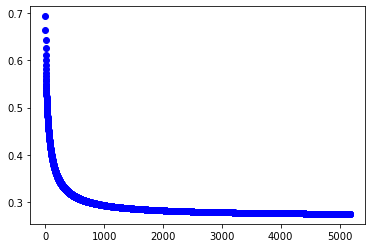

In [86]:
plt.plot(np.arange(len(J)), J, 'bo')

---

The training accuracy is now much higher, as we are essentially producing a non-linear decision surface. The problem is more complex now, so it takes longer to converge.

---

Plotting your results using our old function does not work well now, as we want to plot in the original space, but our model works in the new feature space we created. We have to inform our plotting function about what kind of feature embedding (degrees, means and sigmas it should use). We update this below - once again, you can just accept this code as is.

In [87]:
# Accept this function as is, you can think of it as creating a 3D surface and "cutting" it at 0.5
def plotDecisionBoundary_withEmbeddedFeatures(X, y, w, degrees, means, sigmas):    
    #Plot data
    plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='b') #positive samples
    plt.scatter(X[y==0, 0], X[y==0, 1], marker='x', c='r') #negative samples

    #Plot Decision Boundary
    u = np.linspace(min(X[:,0]), max(X[:,0]), 50)
    v = np.linspace(min(X[:,1]), max(X[:,1]), 50)
    z = np.zeros(shape=(len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):        
            feature, _, _ = mapFeatureAndNormalise_AllQuadTerms(x1 = np.array(u[i]), x2 = np.array(v[j]), degree = degrees, preCalcMeans = means, preCalcStd=sigmas)
            z[i, j] = sigmoid(feature.dot(w))
            
    z = z.T

    cs = plt.contour(u, v, z, levels=[0.5])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.show()

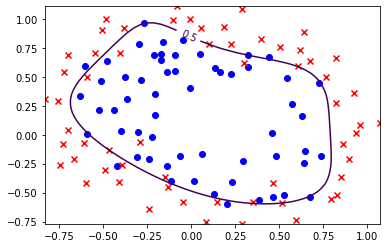

In [88]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

<font color=blue>Use the code below to generate a different number of features by changing the value of `deg` (e.g. features up to degree 1, 2, 3, ...15) and run gradient descent for different degrees. What do you observe?

In [89]:
deg = 15
features, mu, sigma = mapFeatureAndNormalise_AllQuadTerms(X[:,0], X[:,1], degree = deg)

#Logistic Regression gradient descent optimization
w, J = GradientDescent_logistic(features, y)

H = [classifyVector(features[i,:],w) for i in range(features.shape[0])]
print ("Training Accuracy : {0}".format(str(float(np.sum(H == y)) / y.shape[0])))

Training Accuracy : 0.9145299145299145


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


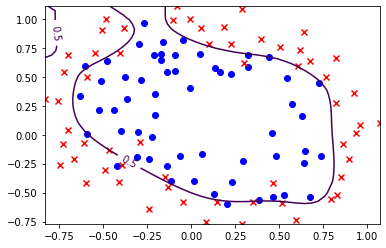

In [90]:
plotDecisionBoundary_withEmbeddedFeatures(X, y, w, deg, mu, sigma)

---

As we introduce more features, the decision surface becomes more complex, and it is able to classify correctly more and more points. But at the same time, it seems that it is eventually becoming too complex for the problem at hand...

---
